In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# open csv file and load the data into pandas dataframe
appl_df = pd.read_csv('../data/raw/loan.csv')
appl_df.info()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [18]:
appl_df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [11]:
appl_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [14]:
appl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [21]:
appl_df.count(axis=0, numeric_only=False)

id                                                  0
member_id                                           0
loan_amnt                                     2260668
funded_amnt                                   2260668
funded_amnt_inv                               2260668
term                                          2260668
int_rate                                      2260668
installment                                   2260668
grade                                         2260668
sub_grade                                     2260668
emp_title                                     2093699
emp_length                                    2113761
home_ownership                                2260668
annual_inc                                    2260664
verification_status                           2260668
issue_d                                       2260668
loan_status                                   2260668
pymnt_plan                                    2260668
url                         

In [5]:
appl_df.drop('member_id', axis=1, inplace=True)
appl_df.drop('id', axis=1, inplace=True)

In [7]:
appl_df.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [ ]:
appl_df.shape

In [4]:
df_cleanAppl = appl_df[(appl_df.loan_status == 'Fully Paid') | (appl_df.loan_status == 'Charged Off')]

In [9]:
df_cleanAppl.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [7]:
df_cleanAppl.shape

(1303607, 143)

In [12]:
df_cleanAppl.loan_status.value_counts(normalize=True) #About 80% are ‘Fully Paid’ and 20% are ‘Charged Off’So our sample is biased in this case

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

In [7]:
df_cleanAppl.isnull().any().value_counts() #103 COLUMNS HAVE MISSING VALUES

True     103
False     40
dtype: int64

In [5]:
total_num = df_cleanAppl.isnull().sum().sort_values(ascending=False)
perc = df_cleanAppl.isnull().sum()/df_cleanAppl.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis=1, keys =["Total Missing Values", "Percentage %"], sort=True).sort_values(by =["Percentage %"], ascending = False)
df_miss.reset_index(inplace=True)

In [88]:
df_miss

,Total Missing Values,Percentage %
url,1303607,100.00
next_pymnt_d,1303607,100.00
orig_projected_additional_accrued_interest,1300174,99.74
deferral_term,1298272,99.59
hardship_last_payment_amount,1298272,99.59
hardship_payoff_balance_amount,1298272,99.59
hardship_end_date,1298272,99.59
hardship_dpd,1298272,99.59
hardship_amount,1298272,99.59
hardship_reason,1298272,99.59


In [14]:
df_miss[df_miss['Percentage %']>50].count()

index                   56
Total Missing Values    56
Percentage %            56
dtype: int64

In [92]:
df_miss.count()

Total Missing Values    143
Percentage %            143
dtype: int64

In [6]:
# drop all those features that has more than 50% missing values
df_NewAppl = df_cleanAppl.drop(df_miss[df_miss["Percentage %"]>50]["index"], axis = 1)

In [10]:
df_NewAppl.shape

(1303607, 87)

In [101]:
df_miss[df_miss["Percentage %"]>50]["index"] # features that were dropped

0                                            url
1                                   next_pymnt_d
2     orig_projected_additional_accrued_interest
3                                  deferral_term
4                   hardship_last_payment_amount
5                 hardship_payoff_balance_amount
6                              hardship_end_date
7                                   hardship_dpd
8                                hardship_amount
9                                hardship_reason
10                           hardship_start_date
11                               hardship_status
12                                 hardship_type
13                          hardship_loan_status
14                               hardship_length
15                       payment_plan_start_date
16           sec_app_mths_since_last_major_derog
17                            sec_app_revol_util
18                         sec_app_num_rev_accts
19              sec_app_chargeoff_within_12_mths
20                  

In [7]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']
drop_list = [col for col in df_NewAppl.columns if col not in keep_list]
print(drop_list) 

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex

In [8]:
df_NewAppl.drop(labels=drop_list, axis=1, inplace=True)

In [12]:
df_NewAppl.shape

(1303607, 28)

In [9]:
sorted(df_NewAppl.columns)

['addr_state',
 'annual_inc',
 'application_type',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'verification_status',
 'zip_code']

In [10]:
#Zip code is in the format-891xx    900xx    etc. We have clean that.
df_NewAppl.zip_code = df_NewAppl.zip_code.str.replace("xx","") 

In [11]:
#Next is formatting the dates- for e.g. Oct-2013 to 2015-10-01  format
df_NewAppl.issue_d = pd.to_datetime(df_NewAppl.issue_d,infer_datetime_format=True)
df_NewAppl['earliest_cr_line'] = pd.to_datetime(df_NewAppl['earliest_cr_line'],infer_datetime_format=True)

Next is cleaning up the employment length feature as follows-
The values are -
10+ years
 < 1 year
 2 years
 3 years etc
We will make it as 0/1/2/3/...10 etc

In [12]:
df_NewAppl['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df_NewAppl['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(str_val):
    if pd.isnull(str_val):
        return str_val
    else:
        return np.int8(str_val.split()[0])
df_NewAppl['emp_length'] = df_NewAppl['emp_length'].apply(emp_length_to_int)

In [18]:
#Next we will move on to EDA with individual features

Next, We will inspect each feature individually.
We will perform the univariate and bivariate analysis using the folloiwng steps-
    Summary statistics
    Plot individually
    Plot against our target variable- loan_status
    Modify the feature to make it ready for modelling, if necessary

	For individual summary statistics we will use 
        .describe()
        .sample(5)
        .nunique()
     
    Finally we will plot the feature against our target feature loan_status to see if and how both are related


In [13]:
def plot_var(col_name, full_name, continuous):
    """
    plot a variable with and without loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name- for display purposes
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df_NewAppl.loc[df_NewAppl[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df_NewAppl[col_name], order=sorted(df_NewAppl[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df_NewAppl, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df_NewAppl.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

    
def print_stats(col_name, group_by=False):
    """
    print the general statistics of the passed column
    """
    print('-'*60, '\n Individual Summary Statistics for', col_name, '\n', '-'*60)
    print('Describe \n',df_NewAppl[col_name].describe(), '\n', '-'*20)
    print('Sample Observations \n',df_NewAppl[col_name].sample(5), '\n', '-'*20)
    print('Number of Uniques \n',df_NewAppl[col_name].nunique(), '\n', '-'*20)
    num_uniques = df_NewAppl[col_name].nunique()
    if num_uniques <10: 
        print('Unique value counts \n', df_NewAppl[col_name].value_counts(), '\n', '-'*20)
        
    if group_by:
        print('Group_by \n', df_NewAppl.groupby('loan_status')[col_name].describe(), '\n','-'*20)

1.addr_state
2.zip_code

In [24]:
print_stats('addr_state')

------------------------------------------------------------ 
 Individual Summary Statistics for addr_state 
 ------------------------------------------------------------
Describe 
 count     1303607
unique         51
top            CA
freq       191032
Name: addr_state, dtype: object 
 --------------------
Sample Observations 
 1924843    CA
292344     MD
2005357    IL
2049202    TX
1719222    NY
Name: addr_state, dtype: object 
 --------------------
Number of Uniques 
 51 
 --------------------


In [26]:
print_stats('zip_code')


------------------------------------------------------------ 
 Individual Summary Statistics for zip_code 
 ------------------------------------------------------------
Describe 
 count     1303606
unique        943
top           945
freq        14625
Name: zip_code, dtype: object 
 --------------------
Sample Observations 
 830040     080
1062711    173
801787     368
2036232    724
1755232    331
Name: zip_code, dtype: object 
 --------------------
Number of Uniques 
 943 
 --------------------


This shows there are 51 unique states and 943 values for zip_code. 
These are too many values i.e. lot of different zip codes. So we will drop the zip_code column. 
Instead we will keep the state

In [14]:
df_NewAppl.drop(labels='zip_code', axis=1, inplace=True)

3. annual_inc

The summary stats show annual income values range from 0 to 10,999,200 with a median of 65,000. Since the values vary so much we will take a log transform of the feature. We will create a new feature called 'annual_inc_log' and store these values there and then drop the feature annual_inc. 

From the plot it appears that individuals who paid off the loans have slightly higher annual income.
13.lOan _title

In [27]:
df_NewAppl['annual_inc'].describe()

count    1.303607e+06
mean     7.615899e+04
std      7.004890e+04
min      0.000000e+00
25%      4.584000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

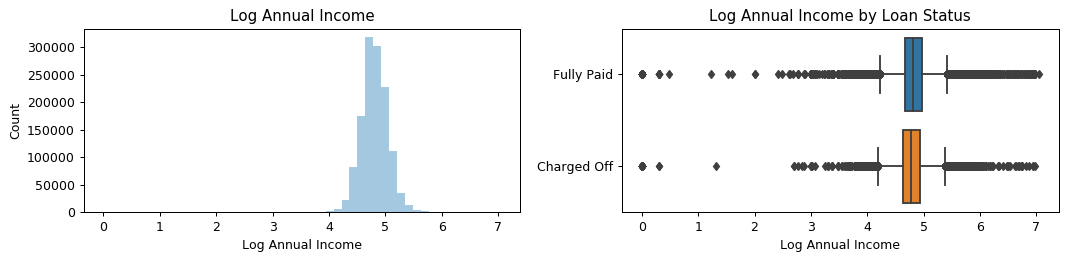

In [15]:
df_NewAppl['annual_inc_log'] = df_NewAppl['annual_inc'].apply(lambda x : np.log10(x+1))
df_NewAppl.drop('annual_inc', axis=1, inplace=True)
plot_var('annual_inc_log', 'Log Annual Income', continuous=True)


In [29]:
print_stats('annual_inc_log', True)

------------------------------------------------------------ 
 Individual Summary Statistics for annual_inc_log 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     4.812791e+00
std      2.453588e-01
min      0.000000e+00
25%      4.661254e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: annual_inc_log, dtype: float64 
 --------------------
Sample Observations 
 2052837    5.403122
1831006    4.823220
2075765    4.845104
527839     4.954247
1134840    4.763435
Name: annual_inc_log, dtype: float64 
 --------------------
Number of Uniques 
 62988 
 --------------------
Group_by 
                  count      mean       std  min       25%       50%       75%       max
loan_status                                                                            
Charged Off   261655.0  4.781632  0.240262  0.0  4.633479  4.778158  4.929424  6.977724
Fully Paid   1041952.0  4.820615  0.246003  0.0  4.672107  4.812920  4.9

4. loan_amnt




------------------------------------------------------------ 
 Individual Summary Statistics for loan_amnt 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     1.441681e+04
std      8.699542e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64 
 --------------------
Sample Observations 
 1340642    13375
1136727    15000
1959944    17700
535381     30000
890918     18000
Name: loan_amnt, dtype: int64 
 --------------------
Number of Uniques 
 1553 
 --------------------
Group_by 
                  count          mean          std    min     25%      50%      75%      max
loan_status                                                                                
Charged Off   261655.0  15548.979381  8797.539356  900.0  9000.0  14350.0  20400.0  40000.0
Fully Paid   1041952.0  14132.493699  8651.520017  500.0  7500.0  12000.0  20000.0  40000.0 


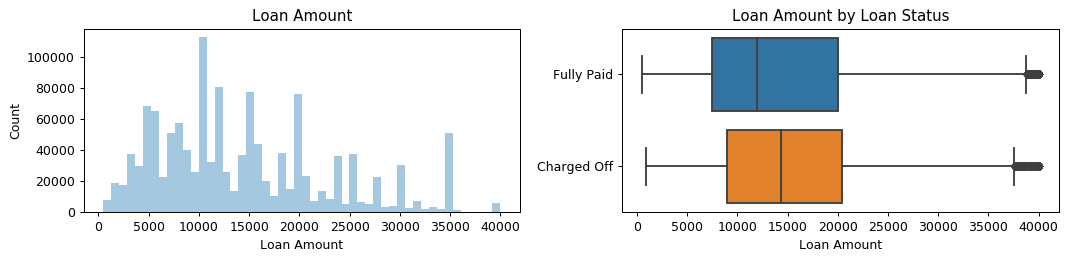

In [30]:
print_stats('loan_amnt', True)
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [55]:
#After plotting we see charged off loans have higher loan amount

5. term

In [31]:
print_stats('term')



------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count        1303607
unique             2
top        36 months
freq          988754
Name: term, dtype: object 
 --------------------
Sample Observations 
 2019310     36 months
787996      36 months
1766932     36 months
994743      36 months
1059301     60 months
Name: term, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
  36 months    988754
 60 months    314853
Name: term, dtype: int64 
 --------------------


In [16]:
#Term has values ‘36 months’ or ‘60 months’. We will convert it into integer as follows
df_NewAppl['term'] = df_NewAppl['term'].apply(lambda s: np.int8(s.split()[0]))

In [32]:
df_NewAppl['term'].value_counts(normalize=True) #SHows about 76% of loans have 3 year period and rest are 5 year loans

 36 months    0.758476
 60 months    0.241524
Name: term, dtype: float64

In [33]:
df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#If we focus only on charged off loans, 5 year loans are almost TWICE as likely to go BAD as 3 year loans!!!

term
 36 months    0.160959
 60 months    0.325568
Name: loan_status, dtype: float64

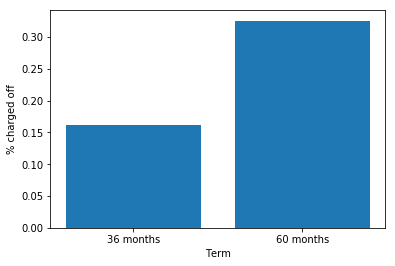

In [20]:
plt.bar(['36 months', '60 months'], height= df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']) 
plt.xlabel('Term')
plt.ylabel('% charged off')
plt.show()


6. Int_rate

In [73]:
print_stats('int_rate', True)


------------------------------------------------------------ 
 Individual Summary Statistics for int_rate 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     1.325722e+01
std      4.760544e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64 
 --------------------
Sample Observations 
 1136333    18.55
1745218    24.89
729104      7.89
739783     19.99
778206     17.27
Name: int_rate, dtype: float64 
 --------------------
Number of Uniques 
 654 
 --------------------
Group_by 
                  count       mean       std   min    25%    50%    75%    max
loan_status                                                                  
Charged Off   261655.0  15.712087  4.897685  5.31  12.29  15.05  18.55  30.99
Fully Paid   1041952.0  12.640755  4.520709  5.31   9.17  12.29  15.31  30.99 
 --------------------


Shows int_rate ranges from 5 to 30%!!!

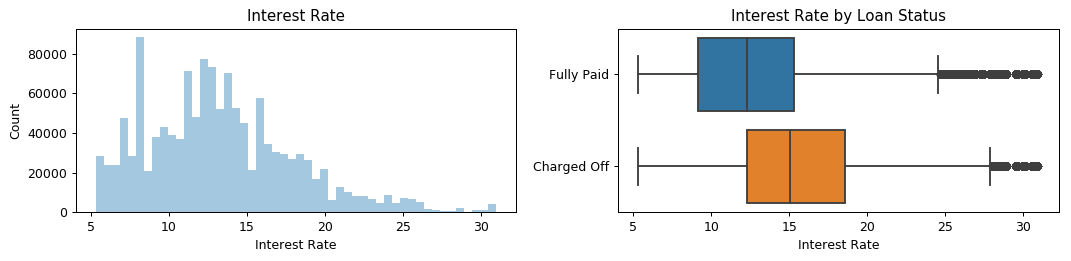

In [38]:
plot_var('int_rate', 'Interest Rate', continuous=True)

Shows charged off loans have much HIGHER interest rate!!

Next let's compare the summary statistics by loan status:

In [75]:
df_NewAppl.groupby('loan_status')['int_rate'].describe()

                 count       mean       std   min    25%    50%    75%    max
loan_status                                                                  
Charged Off   261655.0  15.712087  4.897685  5.31  12.29  15.05  18.55  30.99
Fully Paid   1041952.0  12.640755  4.520709  5.31   9.17  12.29  15.31  30.99


7. Installment

In [76]:
print_stats('installment')

------------------------------------------------------------ 
 Individual Summary Statistics for installment 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     4.380850e+02
std      2.610632e+02
min      4.930000e+00
25%      2.488200e+02
50%      3.754300e+02
75%      5.804500e+02
max      1.719830e+03
Name: installment, dtype: float64 
 --------------------
Sample Observations 
 1070565    625.09
782668     619.23
1708395    279.72
2000542    386.38
1893158    585.47
Name: installment, dtype: float64 
 --------------------
Number of Uniques 
 82574 
 --------------------


In [ ]:
#Installments range from $4.93 to $1,719, with a median of $375

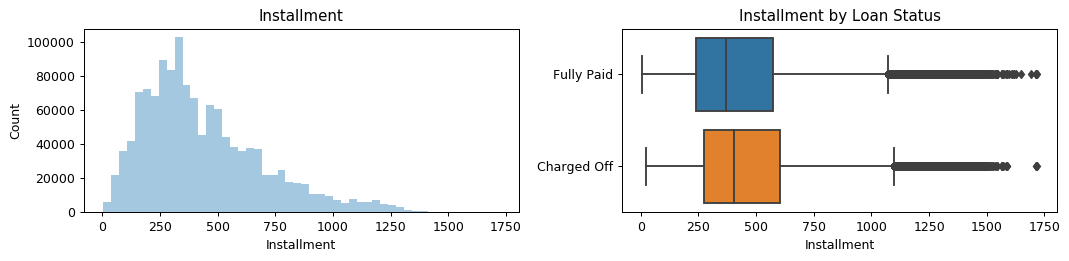

In [67]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [43]:
df_NewAppl.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,464.749514,262.341293,21.62,275.22,402.83,604.145,1717.63
Fully Paid,1041952.0,431.388962,260.312645,4.93,241.12,368.63,573.060,1719.83


8. grade
9. sub_grade

In [77]:
print(sorted(df_NewAppl['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [78]:
print(sorted(df_NewAppl['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [21]:
#the grade is implied by the subgrade, so let's drop the grade column.
df_NewAppl.drop('grade', axis=1, inplace=True)

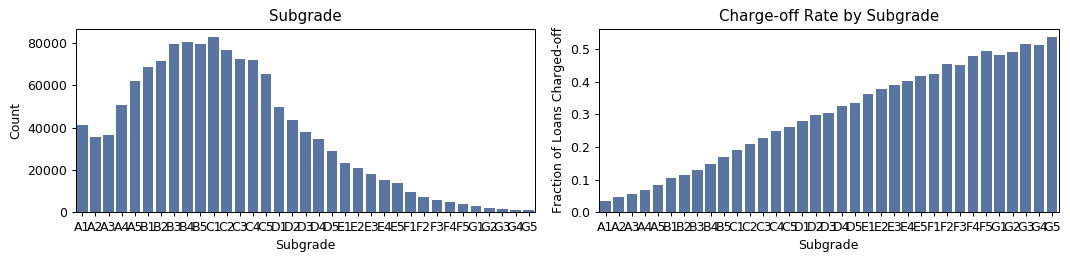

In [80]:
plot_var('sub_grade', 'Subgrade', continuous=False)

There's a clear trend of higher probability of charge-off as the subgrade gets worse!

10. emp_title

In [83]:
print_stats('emp_title')

------------------------------------------------------------ 
 Individual Summary Statistics for emp_title 
 ------------------------------------------------------------
Describe 
 count     1221028
unique     371435
top       Teacher
freq        20496
Name: emp_title, dtype: object 
 --------------------
Sample Observations 
 693490         Support Manger
1119887    Nurse Practitioner
2074655        Vice President
1845884           wells fargo
2107142                  usaf
Name: emp_title, dtype: object 
 --------------------
Number of Uniques 
 371435 
 --------------------


In [22]:
#There are too many unique values of emp_title to be useful. So we will drop this feature
df_NewAppl.drop(labels='emp_title', axis=1, inplace=True)

11. emp_length

In [23]:
print_stats('emp_length')
df_NewAppl['emp_length'].value_counts(dropna=False).sort_index()

------------------------------------------------------------ 
 Individual Summary Statistics for emp_length 
 ------------------------------------------------------------
Describe 
 count    1.228153e+06
mean     5.968936e+00
std      3.689503e+00
min      0.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.000000e+01
Name: emp_length, dtype: float64 
 --------------------
Sample Observations 
 1406595     8.0
2087976    10.0
1515732     9.0
1340799     9.0
1197125     5.0
Name: emp_length, dtype: float64 
 --------------------
Number of Uniques 
 11 
 --------------------


 0.0     104550
 1.0      85677
 2.0     117820
 3.0     104200
 4.0      78029
 5.0      81623
 6.0      60933
 7.0      58145
 8.0      59125
 9.0      49504
 10.0    428547
NaN       75454
Name: emp_length, dtype: int64

Note there are 75454 loans with missing value for the length of employment.


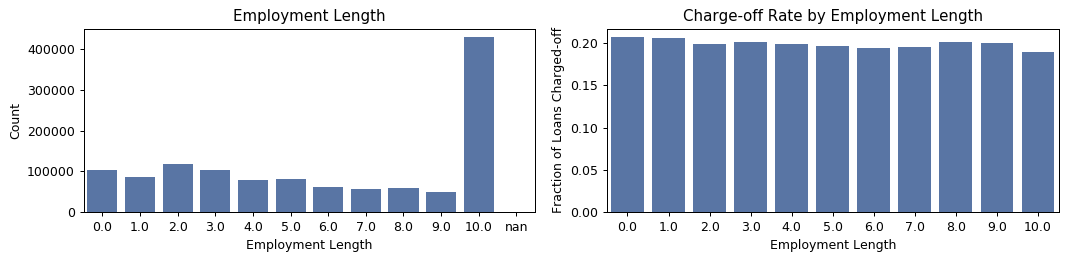

In [89]:
plot_var('emp_length', 'Employment Length', continuous=False)

THere doesn't seem to be significant effect of employment length on loan status
As the plot shows loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

12. home_ownership

In [90]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    645496
RENT        517808
OWN         139844
ANY            267
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

Let's combine the category ANY and NONO into OTHER

In [24]:
df_NewAppl['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [92]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    645496
RENT        517808
OWN         139844
OTHER          459
Name: home_ownership, dtype: int64

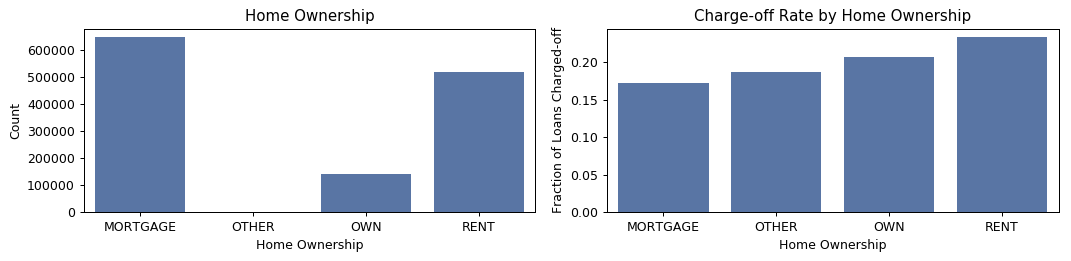

In [93]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appears to be significant differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [59]:

df_NewAppl.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#.plot(kind='bar', color='red')


home_ownership
MORTGAGE    0.172986
OTHER       0.187364
OWN         0.207453
RENT        0.233477
Name: loan_status, dtype: float64

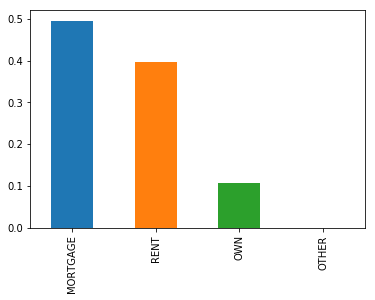

In [54]:
df_NewAppl['home_ownership'].value_counts(dropna=False, normalize = True).plot(kind='bar')

13. application_type
Tells whether the loan application is individual or joint application

From our plot and summary stats we see that - Joint loans are more likely to be charged off than individual loans

In [99]:
print_stats('application_type', True)


print(df_NewAppl.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])
#print(df_NewAppl['loan_status'== 'Charged Off'].groupby('application_type')['loan_status'].value_counts(normalize=True))


------------------------------------------------------------ 
 Individual Summary Statistics for application_type 
 ------------------------------------------------------------
Describe 
 count        1303607
unique             2
top       Individual
freq         1280370
Name: application_type, dtype: object 
 --------------------
Sample Observations 
 1758675    Individual
718619     Individual
2011096    Individual
2130636    Individual
1336569    Individual
Name: application_type, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 Individual    1280370
Joint App       23237
Name: application_type, dtype: int64 
 --------------------
Group_by 
                count unique         top     freq
loan_status                                     
Charged Off   261655      2  Individual   255926
Fully Paid   1041952      2  Individual  1024444 
 --------------------
application_type
Individual    0.199884
Joint App     0.246546
Name: loan

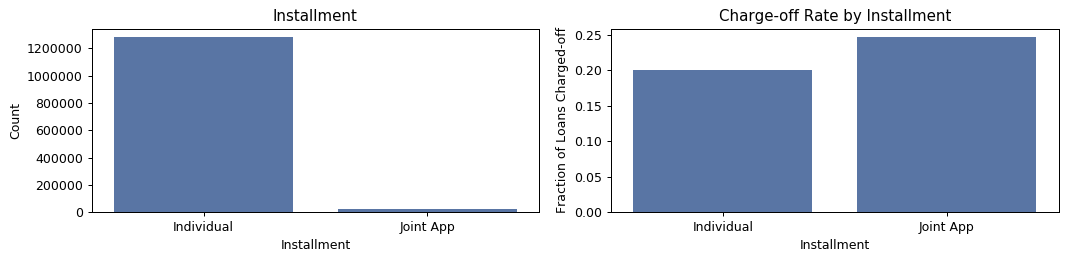

In [100]:
plot_var('application_type', 'Installment', continuous=False)

14. dti : debt to income ratio (debt excluding mortgage and current application debt)

In [101]:
print_stats('dti')

------------------------------------------------------------ 
 Individual Summary Statistics for dti 
 ------------------------------------------------------------
Describe 
 count    1.303295e+06
mean     1.825875e+01
std      1.093849e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.404000e+01
max      9.990000e+02
Name: dti, dtype: float64 
 --------------------
Sample Observations 
 1341958    14.80
1241054    22.68
1266007    13.39
1277627    17.21
542445     11.42
Name: dti, dtype: float64 
 --------------------
Number of Uniques 
 6870 
 --------------------


There seems to be some outliers. Since the values range from -1 to 999 with 75% values below 24. 


In [17]:
#df_NewAppl.groupby('target')['dti'].value_counts(normalize=True)
df_NewAppl.dti.nunique()

6870

In [18]:
df_NewAppl.shape

(1303607, 27)

In [50]:
df_NewAppl[df_NewAppl.dti > 24].dti.count()

327127

15. initial_list_status: Initial listing status of the listing

In [19]:
print_stats('initial_list_status')

------------------------------------------------------------ 
 Individual Summary Statistics for initial_list_status 
 ------------------------------------------------------------
Describe 
 count     1303607
unique          2
top             w
freq       751214
Name: initial_list_status, dtype: object 
 --------------------
Sample Observations 
 2099624    f
1126254    w
1409057    w
1913437    w
1923354    w
Name: initial_list_status, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 w    751214
f    552393
Name: initial_list_status, dtype: int64 
 --------------------


16. mort_acc: number of mortgage accounts

In [20]:
print_stats('mort_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for mort_acc 
 ------------------------------------------------------------
Describe 
 count    1.256326e+06
mean     1.676875e+00
std      2.005056e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64 
 --------------------
Sample Observations 
 1978156    4.0
360863     3.0
1708955    0.0
819930     4.0
727253     0.0
Name: mort_acc, dtype: float64 
 --------------------
Number of Uniques 
 38 
 --------------------


17. open_acc: the number of open credit lines in borrower's credit line

In [21]:
print_stats('open_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for open_acc 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     1.159234e+01
std      5.465282e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      9.000000e+01
Name: open_acc, dtype: float64 
 --------------------
Sample Observations 
 695353     17.0
1564672     7.0
2062173     8.0
2226516    11.0
544089     15.0
Name: open_acc, dtype: float64 
 --------------------
Number of Uniques 
 84 
 --------------------


18. pub_rec : number of derogatory public accounts

In [22]:
print_stats('pub_rec')

------------------------------------------------------------ 
 Individual Summary Statistics for pub_rec 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     2.155220e-01
std      6.028619e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.600000e+01
Name: pub_rec, dtype: float64 
 --------------------
Sample Observations 
 930200     0.0
960439     0.0
1803588    0.0
2223015    0.0
947572     0.0
Name: pub_rec, dtype: float64 
 --------------------
Number of Uniques 
 37 
 --------------------


In [ ]:
19. pub_rec_bankruptcies: number of public record bankruptcies

In [66]:
print_stats('pub_rec_bankruptcies')
print(df_NewAppl.pub_rec_bankruptcies.value_counts())
print(df_NewAppl.pub_rec_bankruptcies.value_counts(normalize=True))

------------------------------------------------------------ 
 Individual Summary Statistics for pub_rec_bankruptcies 
 ------------------------------------------------------------
Describe 
 count    1.302910e+06
mean     1.346985e-01
std      3.782756e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: pub_rec_bankruptcies, dtype: float64 
 --------------------
Sample Observations 
 836643     0.0
523217     0.0
1406439    0.0
1140404    0.0
2000920    0.0
Name: pub_rec_bankruptcies, dtype: float64 
 --------------------
Number of Uniques 
 12 
 --------------------
0.0     1140180
1.0      153011
2.0        7590
3.0        1539
4.0         381
5.0         136
6.0          45
7.0          15
8.0           9
9.0           2
12.0          1
11.0          1
Name: pub_rec_bankruptcies, dtype: int64
0.0     8.751027e-01
1.0     1.174379e-01
2.0     5.825422e-03
3.0     1.181202e-03
4.0     2.924223e-04
5.0     1.043817e-0

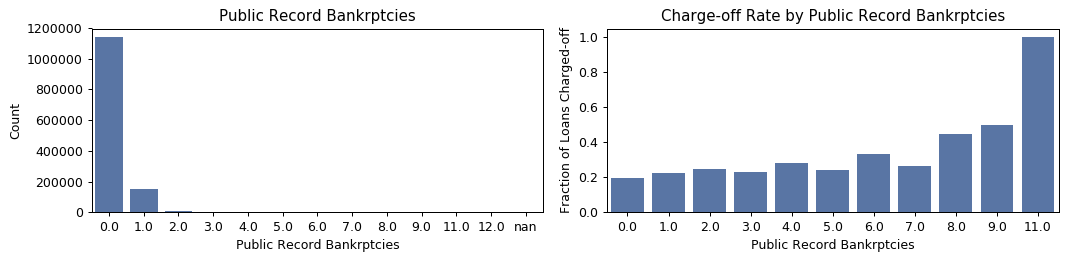

In [27]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankrptcies', continuous=False)

20. purpose: a category provided by the borrower for the loan request

In [24]:
print_stats('purpose')

------------------------------------------------------------ 
 Individual Summary Statistics for purpose 
 ------------------------------------------------------------
Describe 
 count                1303607
unique                    14
top       debt_consolidation
freq                  757591
Name: purpose, dtype: object 
 --------------------
Sample Observations 
 1874744    debt_consolidation
1143030    debt_consolidation
1178676           credit_card
1752792    debt_consolidation
933403     debt_consolidation
Name: purpose, dtype: object 
 --------------------
Number of Uniques 
 14 
 --------------------


In [ ]:
21. revol_bal: total credit revolving balance

In [25]:
print_stats('revol_bal')

------------------------------------------------------------ 
 Individual Summary Statistics for revol_bal 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     1.623599e+04
std      2.228629e+04
min      0.000000e+00
25%      5.952000e+03
50%      1.114000e+04
75%      1.974800e+04
max      2.904836e+06
Name: revol_bal, dtype: float64 
 --------------------
Sample Observations 
 1972828     7601
1208821    16259
1101103     5923
1180768     9722
893462     19026
Name: revol_bal, dtype: int64 
 --------------------
Number of Uniques 
 82819 
 --------------------


In [ ]:
22. revol_util: revolving line utilization rate or 

In [28]:
print_stats('revol_util')

------------------------------------------------------------ 
 Individual Summary Statistics for revol_util 
 ------------------------------------------------------------
Describe 
 count    1.302797e+06
mean     5.191014e+01
std      2.450155e+01
min      0.000000e+00
25%      3.360000e+01
50%      5.230000e+01
75%      7.080000e+01
max      8.923000e+02
Name: revol_util, dtype: float64 
 --------------------
Sample Observations 
 1053607    41.4
2036436    51.2
1196102    59.0
757358      8.8
1294306    61.2
Name: revol_util, dtype: float64 
 --------------------
Number of Uniques 
 1363 
 --------------------


In [ ]:
23. title

In [29]:
print_stats('title')

------------------------------------------------------------ 
 Individual Summary Statistics for title 
 ------------------------------------------------------------
Describe 
 count                1288181
unique                 61678
top       Debt consolidation
freq                  638945
Name: title, dtype: object 
 --------------------
Sample Observations 
 1461262    Moving and relocation
1662962       Debt consolidation
1723479       Debt Consolidation
1689733       Debt consolidation
1249979       Debt consolidation
Name: title, dtype: object 
 --------------------
Number of Uniques 
 61678 
 --------------------


In [ ]:
24. total_acc: the total number of credit lines currently in the borrower's credit line

In [30]:
print_stats('total_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for total_acc 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     2.501894e+01
std      1.199584e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64 
 --------------------
Sample Observations 
 1116943    23.0
1924092    14.0
1242980    33.0
1737497    19.0
1111279    33.0
Name: total_acc, dtype: float64 
 --------------------
Number of Uniques 
 142 
 --------------------


In [ ]:
25. verification_status

In [31]:
print_stats('verification_status')

------------------------------------------------------------ 
 Individual Summary Statistics for verification_status 
 ------------------------------------------------------------
Describe 
 count             1303607
unique                  3
top       Source Verified
freq               503726
Name: verification_status, dtype: object 
 --------------------
Sample Observations 
 1128831       Not Verified
1697652           Verified
999783     Source Verified
2037794    Source Verified
830919     Source Verified
Name: verification_status, dtype: object 
 --------------------
Number of Uniques 
 3 
 --------------------
Unique value counts 
 Source Verified    503726
Verified           407676
Not Verified       392205
Name: verification_status, dtype: int64 
 --------------------


Next we will perform a statistical analysis to establish whether term has a significant impact on the charge backs aka our target variable loan_status

1. Test
We will use Z statistic test for this problem
Explaination- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis

Null Hypothesis H0: There are no differences in both sample proportions i.e. term has no impact on the charge back

Alternate hypothesis H1: Both sample proportions are different i.e. term has impact on the charge backs

3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [98]:
print_stats('term')

------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count    1.303607e+06
mean     4.179659e+01
std      1.027218e+01
min      3.600000e+01
25%      3.600000e+01
50%      3.600000e+01
75%      3.600000e+01
max      6.000000e+01
Name: term, dtype: float64 
 --------------------
Sample Observations 
 619494     60
930186     36
1999661    36
802441     36
2192320    60
Name: term, dtype: int64 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 36    988754
60    314853
Name: term, dtype: int64 
 --------------------


In [41]:
df1 = df_NewAppl[df_NewAppl.term == 36][['loan_status', 'term']].sample(100)
df2 = df_NewAppl[df_NewAppl.term==60][['loan_status', 'term']].sample(100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [108]:
df_sample.describe()

,term
count,100.000000
mean,48.000000
std,12.060454
min,36.000000
25%,36.000000
50%,48.000000
75%,60.000000
max,60.000000


In [138]:
df_sample.term.value_counts()

60    100
36    100
Name: term, dtype: int64

In [113]:
df_sample.sample(5)

,loan_status,term,charge_back
1728740,Fully Paid,36,0
557554,Fully Paid,36,0
541890,Fully Paid,36,0
1332715,Fully Paid,60,0
1137957,Charged Off,60,1


In [48]:
df_sample['charge_off'] = df_sample['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)


In [140]:
#next we will find the sample proportions
# number of charge backs for 36 and 60 months term
total_36CB = sum(df_sample[df_sample.term==36].charge_off)
total_60CB = sum(df_sample[df_sample.term==60].charge_off)

total_60 = df_sample[df_sample.term==60].term.count()
total_36 = df_sample[df_sample.term==36].term.count()


In [141]:
print(total_36CB)
print(total_60CB)
print(total_60)
print(total_36)


18
35
100
100


In [152]:
p1 = total_36CB/total_36
p2 = total_60CB/total_60
n1 = total_36
n2 = total_60
confidence_level = 95
p = (p1 * n1 + p2 * n2) / (n1 + n2)
SE = np.sqrt(p * ( 1 - p ) * ( (1/n1) + (1/n2) ))
z = (p1 - p2) / SE
a = 1 - (confidence_level / 100)
p_crit = 1 - a/2

p_val=1-stats.norm.cdf(abs(z))


p_val*=2  # two sided test

z_critical=stats.norm.ppf((1+0.95)/2)

ci_low = p1-p2-z_critical*SE
ci_high = p1-p2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)

P value is 0.006454525399035793
Significance level alpha is 0.050000000000000044
Confidence Interval at 95% is -0.2923290760040881  to  -0.047670923995911885
Margin of Error is  -0.16999999999999998


Interpretation:
     comparing the P-value to the significance level, we see that the P-value is less than the significance level.
     So we have reject the null hypothesis. 
    That means Both sample proportions are different i.e. 
    with 95% confidence we can say that term has significant impact on the charge backs 

Next we will perform a statistical analysis to establish whether interest_rate has a significant impact on the charge backs ie our target variable loan_status

1. Test
We will use two sample Z statistic test two sided for this problem
Explaination- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis

Null Hypothesis H0: There are no differences in both sample proportions i.e. interest_rate has no impact on the charge back

Alternate hypothesis H1: Both sample proportions are different i.e. interest_rate has impact on the charge backs

3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [159]:
df1 = df_NewAppl[df_NewAppl.loan_status == 'Fully Paid'][['loan_status', 'int_rate']].sample(100)
df2 = df_NewAppl[df_NewAppl.loan_status == 'Charged Off'][['loan_status', 'int_rate']].sample(100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [160]:
df_sample.describe()

,int_rate
count,200.000000
mean,14.035800
std,5.100451
min,5.320000
25%,10.470000
50%,13.980000
75%,16.990000
max,30.840000


In [161]:
df_sample.loan_status.value_counts()

Charged Off    100
Fully Paid     100
Name: loan_status, dtype: int64

In [162]:
df_sample.sample(5)

,loan_status,int_rate
1871398,Charged Off,10.49
727253,Fully Paid,18.99
2123165,Fully Paid,12.23
1223934,Charged Off,10.99
1970454,Fully Paid,12.99


In [178]:
m1 = np.mean(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])
std1 = np.std(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])

m2 = np.mean(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])
std2 = np.std(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])

n1 = df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'].count()
n2 = df_sample[df_sample.loan_status == 'Charged Off']['int_rate'].count()
confidence_level = 95

SE = np.sqrt( ((std1*std1)/n1) + ((std2*std2)/n2) )


z = (m1 - m2) / SE
a = 1 - (confidence_level / 100)
p_crit = 1 - a/2

p_val=1-stats.norm.cdf(abs(z))


p_val*=2  # two sided test

z_critical=stats.norm.ppf((1+0.95)/2)

ci_low = m1-m2-z_critical*SE
ci_high = m1-m2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)

P value is 0.0001326365835450094
Significance level alpha is 0.050000000000000044
Confidence Interval at 95% is -4.0157799935974055  to  -1.2930200064026065
Margin of Error is  -2.654400000000006


Interpretation:
     comparing the P-value to the significance level, we see that the P-value is less than the significance level.
     So we have reject the null hypothesis. 
    That means Both sample means are different i.e. 
    with 95% confidence we can say that int_rate has significant impact on the charge offs 

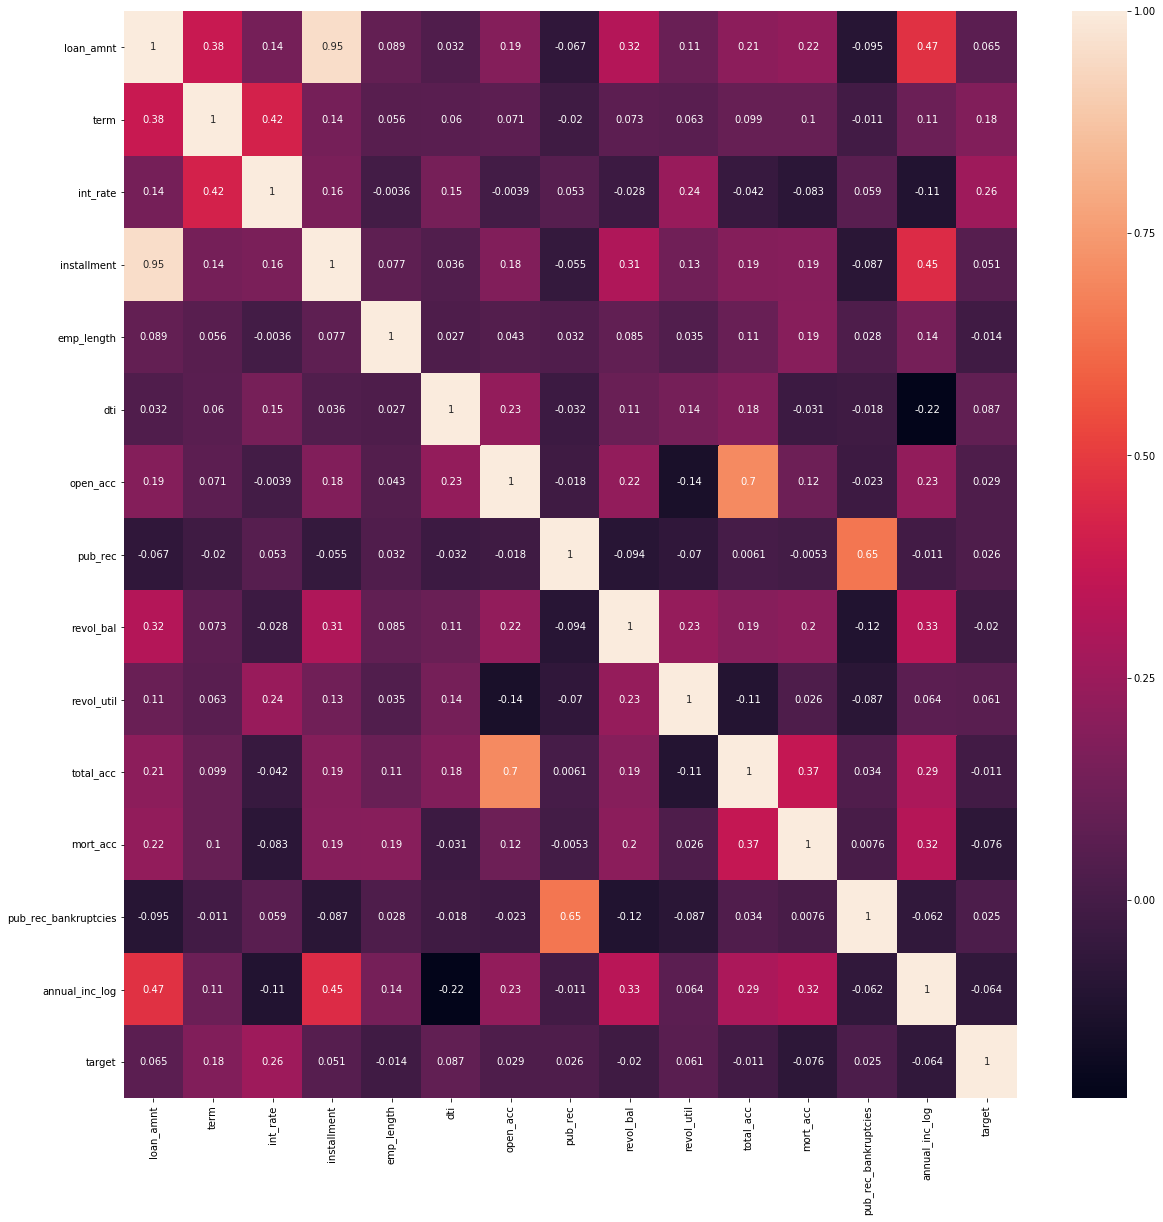

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(df_NewAppl.corr(), annot=True)

In [58]:
plot_list = ['annual_inc_log', 'application_type', 'dti', 'int_rate', 'loan_amnt', 'loan_status']
df_plot = pd.DataFrame()
df_plot['charge_off'] = df_NewAppl['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)
df_plot[plot_list] = df_NewAppl[plot_list]

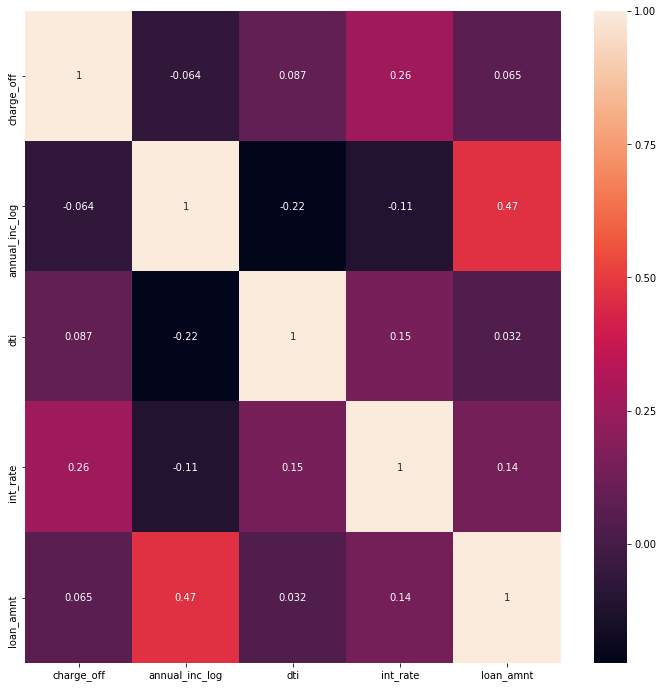

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(df_plot.corr(), annot=True)